<a href="https://colab.research.google.com/github/aissahm/urban-data/blob/master/Time_Series_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploration of the taxi trips time series**

## **Introduction**

In this Jupyter notebook, I will explore the time series constructed in the previous Jupyter Notebook (https://github.com/aissahm/urban-data/blob/master/ConstructTimeSeriesMatrix.ipynb)


For each region ID included in the time series matrix, I will check if it has a significant amount of taxi trips to build a prediction model on top of it, or not. If it has enough data, then I will compute its correlation against the other region IDs considered. That correlation matrix will help in understanding the interactions between the various regions of Chicago.

## **Setting up the environment**

First step is uploading the time series CSV file from: https://github.com/aissahm/urban-data/tree/master/data

In [31]:
import numpy as np

#Libraries needed in this notebook
import cv2
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
import numpy as np

data = np.loadtxt("/content/timeseriesuptooct.csv", delimiter=',')

## **First exploration of the time series of taxi trips**

The function below returns the total number of taxi trips for a period starting from January 1st to endIndex, given the taxi trips time series. This matrix is called the Weight matrix in the research paper "FCCF: Forecasting Citywide Crowd Flows Based on Big Data" written by Minh X. Hoang, Yu Zheng, and Ambuj K. Singh. 

In [3]:
import timeSeriesMatrix
import timefunctions

def returnTotalTaxiTripsArray(timeseriesMatrix, endIndex = 2160*2):
  m = len(timeseriesMatrix[0])
  n = len(timeseriesMatrix)
  weightArray = []
  for timeSeriesArray in timeseriesMatrix:
    weightElement = 0
    j = 0
    while j < m and j < endIndex:
      weightElement = weightElement + timeSeriesArray[j]
      j = j + 1
    weightArray.append(weightElement)
  
  return weightArray

def returnDailyTotalTaxiTripsTimeSeries(timeseriesMatrix):
  m = len(timeseriesMatrix[0])
  n = len(timeseriesMatrix)
  initialHourlyVector = timefunctions.returnInitialHourlyVector()
  totalTaxiTripsTimeSeries = [0] * len(initialHourlyVector)
  for timeSeriesArray in timeseriesMatrix:
    j = 0
    while j < m:
      index = int(j/2)
      previousvalue = totalTaxiTripsTimeSeries[index]
      totalTaxiTripsTimeSeries[index] = previousvalue + timeSeriesArray[j]
      j = j + 2
  dailyTaxiTripsTimeSeries = [0] * int(len(initialHourlyVector)/24)
  j = 0
  l = len(totalTaxiTripsTimeSeries)
  while j < l:
    startIndex = j
    endIndex = j + 24
    dailytotaltaxitrips = np.sum(totalTaxiTripsTimeSeries[startIndex:endIndex])
    index = int(j/24)
    dailyTaxiTripsTimeSeries[index] = dailytotaltaxitrips
    j = j + 24
  return dailyTaxiTripsTimeSeries

In [4]:
weightArray = returnTotalTaxiTripsArray(data)

totalTaxiTrips = np.sum(weightArray)

percentageWeightArray = weightArray.copy()
percentageWeightArray.sort(reverse=True)
i = 0
n = len(percentageWeightArray)
cumulativePercentageWeightArray = []
previousValue = 0
while i < n:
  percentageWeightArray[i] = 100*percentageWeightArray[i] / totalTaxiTrips
  cumulativePercentageWeightArray.append(percentageWeightArray[i] + previousValue)
  previousValue = previousValue + percentageWeightArray[i]
  i = i + 1

In [5]:
print(percentageWeightArray)
print(cumulativePercentageWeightArray)

[31.694551325816942, 17.478903326532542, 9.379644675637747, 8.947698039880512, 6.201354469713825, 5.746320707915249, 5.3364742485471535, 4.562056083476452, 1.9471017473881127, 1.3405025022921593, 1.2002557074111548, 1.0803975433199062, 0.8038767382338423, 0.7792154899624097, 0.7446347730346865, 0.38463551761948744, 0.3357127981509311, 0.26465242319251725, 0.2254992559773856, 0.19982607198660846, 0.19810203335365117, 0.167081830993992, 0.14706799121140074, 0.1206577182398665, 0.1018931818144907, 0.09654616344560864, 0.07649484456230095, 0.0557189297318083, 0.04766092307776876, 0.042713681783195644, 0.042488807178896866, 0.039990200464466004, 0.02962098259957791, 0.029021316988114502, 0.024361415465700937, 0.02266236289988795, 0.022150148523429624, 0.01607853420736262, 0.014167100070823007, 0.012967768847896192, 0.012293145034999859, 0.0045224781531198665, 0.0040352498438058475, 0.0032606817623322794, 0.002810932553734724, 0.0027359743523017975, 0.0014991640286585192, 0.00118683818935466

**Unbalanced flows of taxis over the regions**

Looking at the last array above with cumulative share of total taxi trips in function of the number of regions, ordered from busiest in taxi activity, we notice that just the first 2 regions, among 83 regions recorded with at least one taxi trip, concentrates 50% of all the taxi trips during the period.  

The taxi trips are thus highly unbalanced over the regions of Chicago. That is one major issue. Looking at the entire array, 70 out of 83 represent only 2% of the total crowd flows of taxis. This issue is called data sparsity. For those regions, we won't be able to make any meaningful statistical analysis.

In [6]:
total = 0
for elem in weightArray:
  total = total + elem

print(total)

8004461.0


There was a total of 8 million taxi flows, new-flows and end-flows over all the regions, from the months of January to end of March.

In [7]:
totalTaxiTripsTimeSeries = returnDailyTotalTaxiTripsTimeSeries(data)

print(totalTaxiTripsTimeSeries)

[33353.0, 15240.0, 29953.0, 39442.0, 48980.0, 53499.0, 34426.0, 25333.0, 39672.0, 49284.0, 49667.0, 50732.0, 52722.0, 34566.0, 27038.0, 28897.0, 43161.0, 44802.0, 52971.0, 49130.0, 33895.0, 24392.0, 36682.0, 42404.0, 45385.0, 49285.0, 53313.0, 34627.0, 24683.0, 37574.0, 42497.0, 45032.0, 51440.0, 51722.0, 32307.0, 24010.0, 36806.0, 45859.0, 49541.0, 53957.0, 52268.0, 37462.0, 26799.0, 36645.0, 44640.0, 48934.0, 51136.0, 48370.0, 41442.0, 30682.0, 26811.0, 41235.0, 49657.0, 62479.0, 63092.0, 45866.0, 28750.0, 38413.0, 48220.0, 54461.0, 53447.0, 57399.0, 39542.0, 27768.0, 39134.0, 47690.0, 52135.0, 56953.0, 61566.0, 66363.0, 29247.0, 46167.0, 47655.0, 57858.0, 64130.0, 71301.0, 52113.0, 41087.0, 49094.0, 53185.0, 53701.0, 54626.0, 57396.0, 43551.0, 34336.0, 43783.0, 47261.0, 51537.0, 61237.0, 45460.0, 42417.0, 34155.0, 55005.0, 58174.0, 68272.0, 62363.0, 58612.0, 40534.0, 30165.0, 46918.0, 47502.0, 51873.0, 56927.0, 47641.0, 36475.0, 23584.0, 40365.0, 46954.0, 56233.0, 55607.0, 60691.0, 

In [8]:
import datetime

daysArray = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
monthArray = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

def returnDateFor(dayIndex, startingDate = [2017, 1, 1]):
  dateIndexed = datetime.datetime(startingDate[0], startingDate[1], startingDate[2]) + datetime.timedelta(dayIndex)
  formatedDate = daysArray[dateIndexed.weekday()] + ", " + monthArray[dateIndexed.month - 1] + " " + str(dateIndexed.day)
  return formatedDate

def returnDayIndexFor(dayIndex, startingDate = [2017, 1, 1]):
  dateIndexed = datetime.datetime(startingDate[0], startingDate[1], startingDate[2]) + datetime.timedelta(dayIndex)
  return dateIndexed.weekday()

def returnFirstMonthFor(dayIndex, startingDate = [2017, 1, 1]):
  dateIndexed = datetime.datetime(startingDate[0], startingDate[1], startingDate[2]) + datetime.timedelta(dayIndex)
  formatedDate = ""
  if dateIndexed.day == 1:
    formatedDate = monthArray[dateIndexed.month - 1] + " " + str(dateIndexed.day)
  else:
    formatedDate = str(dayIndex)
  return formatedDate

def returnFirstMonthLabelsArray(startingIndex, endingIndex):
  n = endingIndex - startingIndex
  dateLabelsArray = [''] * n
  i = startingIndex
  while i < endingIndex:
    dateLabelsArray[i - startingIndex] = returnFirstMonthFor(i)
    i = i + 1
  return dateLabelsArray

def returnDateLabelsArray(startingIndex, endingIndex):
  n = endingIndex - startingIndex
  dateLabelsArray = [''] * n
  i = startingIndex
  while i < endingIndex:
    dateLabelsArray[i - startingIndex] = returnDateFor(i)
    i = i + 1
  return dateLabelsArray

In [9]:
def returnAllTaxiTripsByWeekday(timeseriesMatrix, startingIndex, endingIndex, startingDate = [2017, 1, 1]):
  totalTaxiTripsWeekdayMatrix = [ [] for j in range(1) for i in range(7)]

  i = startingIndex
  while i < endingIndex:
    dayIndex = returnDayIndexFor(i, startingDate)
    weekDayArray = totalTaxiTripsWeekdayMatrix[dayIndex]
    weekDayArray.append(timeseriesMatrix[i])
    totalTaxiTripsWeekdayMatrix[dayIndex] = weekDayArray
    i = i + 1
  return totalTaxiTripsWeekdayMatrix

def returnAllTaxiTripsByWeekdayStatistics(timeseriesMatrix, startingIndex, endingIndex, startingDate = [2017, 1, 1]):
  totalTaxiTripsWeekdayMatrix = returnAllTaxiTripsByWeekday(timeseriesMatrix, startingIndex, endingIndex, startingDate)
  totalTaxiTripsWeekdayStatisticsMin = []
  totalTaxiTripsWeekdayStatisticsMax = []
  totalTaxiTripsWeekdayStatisticsMean = []

  for weekdayArray in totalTaxiTripsWeekdayMatrix:
    totalTaxiTripsWeekdayStatisticsMin.append( np.min(weekdayArray) )
    totalTaxiTripsWeekdayStatisticsMax.append( np.max(weekdayArray) )
    meanTaxiTripsForweekDay = np.sum(weekdayArray) / len(weekdayArray)
    totalTaxiTripsWeekdayStatisticsMean.append( meanTaxiTripsForweekDay )

  return [totalTaxiTripsWeekdayStatisticsMin, totalTaxiTripsWeekdayStatisticsMax, totalTaxiTripsWeekdayStatisticsMean]

In [10]:
totalTaxiTripsWeekdayMatrix = returnAllTaxiTripsByWeekdayStatistics(totalTaxiTripsTimeSeries, 0, 8)
print(totalTaxiTripsWeekdayMatrix)
print(returnAllTaxiTripsByWeekday(totalTaxiTripsTimeSeries, 0, 8))
print(totalTaxiTripsTimeSeries[:8])

[[15240.0, 29953.0, 39442.0, 48980.0, 53499.0, 34426.0, 25333.0], [15240.0, 29953.0, 39442.0, 48980.0, 53499.0, 34426.0, 33353.0], [15240.0, 29953.0, 39442.0, 48980.0, 53499.0, 34426.0, 29343.0]]
[[15240.0], [29953.0], [39442.0], [48980.0], [53499.0], [34426.0], [33353.0, 25333.0]]
[33353.0, 15240.0, 29953.0, 39442.0, 48980.0, 53499.0, 34426.0, 25333.0]


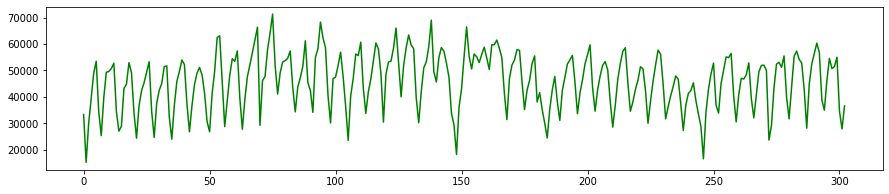

In [20]:
startIndex = 0
lastIndex = 303
plt.plot( totalTaxiTripsTimeSeries[startIndex:lastIndex], 'g')
plt.rcParams["figure.figsize"] = (15,5)
plt.show()

**Various trends spanning over months**

This plot shows the daily taxi trips from January 1st to October 31st. We can notice various trends. The number of taxis increases from January to begining of April (index 0 to 100), then it is stable from April to end of July (100 to 220), then in the month of August, it decreases (220 to 250). Then, it increases again from September to end of October (250 to 300+). 

We can also periodicities spanning over a couple of days. Let's see that in more details.

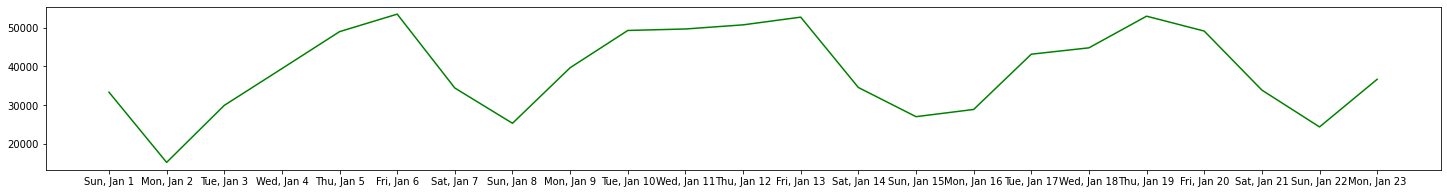

In [15]:
startIndex = 0
lastIndex = 23

dateLabelsArray = returnDateLabelsArray(startIndex, lastIndex)

plt.plot(dateLabelsArray,  totalTaxiTripsTimeSeries[startIndex:lastIndex], 'g')
plt.rcParams["figure.figsize"] = (35,3)
plt.show()

**Weekly periodicity**

In the plot above, from January 1st to January 23rd, we clearly see a weekly periodicity in the flow of taxis.

Now, we plot the range of total taxi trips by weekday, for the 4 periods containing one of the 4 trends identified previously.

Min, mean and max of typical weekly number of 
taxi trips from Sun, Jan 1 to Mon, May 1


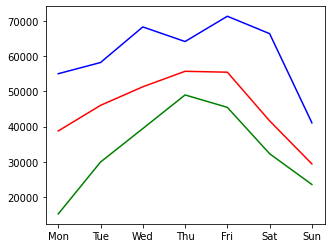

Min, mean and max of typical weekly number of 
taxi trips from Mon, May 1 to Wed, Aug 9


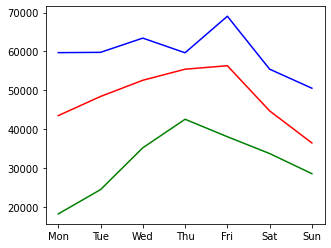

Min, mean and max of typical weekly number of 
taxi trips from Wed, Aug 9 to Fri, Sep 8


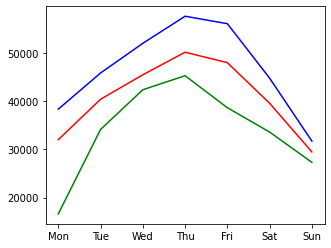

Min, mean and max of typical weekly number of 
taxi trips from Fri, Sep 8 to Tue, Oct 31


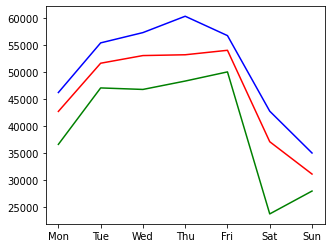

In [23]:
def plotWeeklyTimeSeriesFor(taxiTripsTimeSeries, startingIndex, endingIndex):
  allStatsMatrix = returnAllTaxiTripsByWeekdayStatistics(taxiTripsTimeSeries, startingIndex, endingIndex)
  totalTaxiTripsWeekdayStatisticsMin = allStatsMatrix[0]
  totalTaxiTripsWeekdayStatisticsMax = allStatsMatrix[1]
  totalTaxiTripsWeekdayStatisticsMean = allStatsMatrix[2]

  plotTitle = "Min, mean and max of typical weekly number of "
  print(plotTitle)
  print( "taxi trips from " + returnDateFor(startingIndex) + " to " + returnDateFor(endingIndex) )

  plt.plot( daysArray, totalTaxiTripsWeekdayStatisticsMin, 'g', daysArray, totalTaxiTripsWeekdayStatisticsMax, 'b', daysArray, totalTaxiTripsWeekdayStatisticsMean, 'r')
  plt.rcParams["figure.figsize"] = (5,4)
  plt.show()

periods_array = [[0, 120], [120, 220], [220, 250], [250, 303]]

for period in periods_array:
  startIndex = period[0]
  endIndex = period[1]
  plotWeeklyTimeSeriesFor(totalTaxiTripsTimeSeries, startIndex, endIndex)


Looking at the 4 plots above, we can first notice different levels of taxi trips, confirming the trends spanning over January to end of October. 

In the first two plots, from January to end of July, the patterns are very similar (red curve corresponding to the mean of taxi trips by weekday). The month of August (3rd plot), is a less busy month for the taxis, especially in the weekends.

Finally, from September to October, the demand level clearly increased in general over the weekdays (Monday to Friday), compared to the first 2 plots. Especially if we compare the abrupt demand decrease from Fridays to the weekends in the 3 plots.  

**Daily periodicity**

Now, we plot the hourly flows (end-flows and new-flows), for one region and check any periodicity.

Hourly taxi flows for region ID 66 on the first week of January 2017


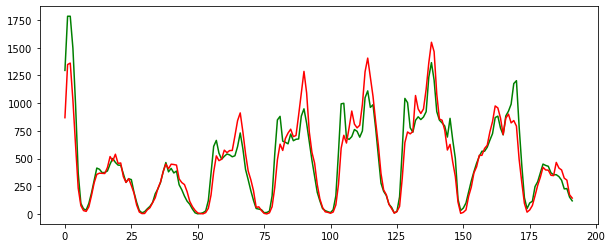

New-flows are in green (taxi pick-ups), end-flows in red (taxi drop-offs)


In [53]:
import visualization

def plotHourlyTimeSeriesForRegionAndPeriod(taxiTripsTimeSeriesMatrix, startingIndex, endingIndex, regionID):
  regionIDindex = timeSeriesMatrix.returnIndexForRegionID(regionID)
  newFlowTimeSeries = []
  endFlowTimeSeries = []
  i = startingIndex
  while i < endingIndex:
    newFlowTimeSeries.append( taxiTripsTimeSeriesMatrix[regionIDindex][i])
    endFlowTimeSeries.append(taxiTripsTimeSeriesMatrix[regionIDindex][i+ 1]) 
    i = i + 2
  
  if len(newFlowTimeSeries) == 0:
    return

  plotTitle = "Hourly taxi flows for region ID " + str(regionID) + " on the first week of January 2017"
  print(plotTitle)
  
  plt.plot( newFlowTimeSeries, 'g', endFlowTimeSeries, 'r')
  plt.rcParams["figure.figsize"] = (10,4)
  plt.show()
  print("New-flows are in green (taxi pick-ups), end-flows in red (taxi drop-offs)")
  

plotHourlyTimeSeriesForRegionAndPeriod(data, 0, 24*8*2, 66)

The plot above represents a little more than one week of taxi trips from January 1st Midnight. We note first a very high starting peak, corresponding to a high demand of taxis on New Year Eve.

We can clearly see a hourly periodicity in the curves. Each day has the same shape, only the amplitude is different and seems to depend on the day of the week.

**Conclusion**

The various plots show daily and weekly periodicities, as well as trends spanning over various months.

Given those findings, we can decompose each taxi flow into 3 components:

*   seasonal flow, capturing the daily periodicity
*   trend flow, capturing the changes in taxi level demand
*   and residual flows for instantaneous changes due to social events, weather, or holidays

## **Histogram of taxi trips per region ID**

This first step will help in determining how to cluster the region IDs.

Here, we reuse the cumulative array of taxi trips, over all regions from January to end of March 2017.

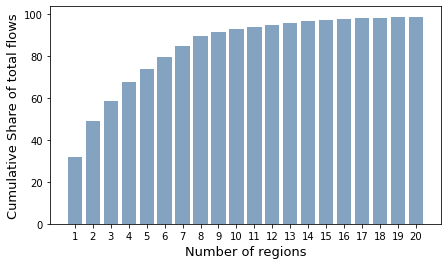

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

cumulativePercentageWeightArray = [31.694551325816942, 49.173454652349484, 58.55309932798723, 67.50079736786775, 73.70215183758157, 79.44847254549681, 84.78494679404396, 89.34700287752041, 91.29410462490853, 92.63460712720068, 93.83486283461184, 94.91526037793174, 95.71913711616558, 96.498352606128, 97.24298737916268, 97.62762289678217, 97.96333569493311, 98.22798811812562, 98.453487374103, 98.65331344608961, 98.85141547944326, 99.01849731043725, 99.16556530164866, 99.28622301988852, 99.38811620170301, 99.48466236514862, 99.56115720971093, 99.61687613944274, 99.66453706252051, 99.7072507443037, 99.7497395514826, 99.78972975194708, 99.81935073454666, 99.84837205153478, 99.87273346700049, 99.89539582990038, 99.9175459784238, 99.93362451263117, 99.94779161270199, 99.96075938154989, 99.9730525265849, 99.97757500473801, 99.98161025458182, 99.98487093634415, 99.98768186889788, 99.99041784325019, 99.99191700727884, 99.9931038454682, 99.99420323242255, 99.99469046073186, 99.99517768904117, 99.99566491735048, 99.99615214565979, 99.99652693666695, 99.99690172767411, 99.99718906744627, 99.99741394205057, 99.9976263236213, 99.99782621215846, 99.99801360766205, 99.99820100316563, 99.99837590563564, 99.99855080810565, 99.99871321754209, 99.99886313394495, 99.99901305034781, 99.99912548764996, 99.99922543191855, 99.99932537618713, 99.99941282742213, 99.99950027865714, 99.99957523685858, 99.99965019506001, 99.99971266022787, 99.99977512539573, 99.99982509753002, 99.99987506966431, 99.99991254876502, 99.99993753483217, 99.99996252089932, 99.99997501393288, 99.99998750696645, 100.00000000000001]

height = cumulativePercentageWeightArray[:20]
bars = ('1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20')
y_pos = np.arange(len(bars))
plt.bar(y_pos, height, color=(0.2, 0.4, 0.6, 0.6))
 
# Custom ticks
plt.xticks(y_pos, bars)

plt.xlabel('Number of regions', fontweight='regular', color = 'black', fontsize='13', horizontalalignment='center')

plt.ylabel('Cumulative Share of total flows', fontweight='regular', color = 'black', fontsize='13', horizontalalignment='center')

plt.rcParams["figure.figsize"] = (10,4)

# You can remove them:
plt.tick_params(bottom='off')


**Regions considered**

We decide to consider the first 20 regions over 83 with the highest taxi trips recorded from January to end of March 2017. They represent 98% of the total crowd flows of taxis.

For the case of Chicago, it isn't possible to cluster the regions into higher-level regions such that the taxi trips are balanced, and each high-level region is composed of regions with similar taxi flows patterns (this would be determined by computing the correlation matrix of adjacent regions). The reason is that the first region contains 30% of the total node weight, the first two 50%. Given this distribution, we would have at most 3 high-level of regions, covering all the areas of Chicago. But in this case, we would lose geographical precision of the taxi flows. An alternative to that was thus to consider fewer regions, not performing any clustering, to preserve the geographical precision and keep enough taxi trips for those regions to create conclusive future forecasts.



On another note, we could have selected less regions. For instance, the first 13 regions concentrate 95% of the total taxi trips. But we also wanted to cover as much area of Chicago as possible. 

## **Map plot of the regions considered**


Now, we show a map of the regions containing enough taxi trip data for forecasting.

The array below contains the region IDs with at least one taxi trip recorded from January to end of March 2017, ordered by the region ID values.

In [25]:
jan_feb_mar_all_region_IDs = [6, 8, 11, 12, 13, 17, 22, 23, 26, 31, 32, 38, 39, 41, 44, 45, 46, 49, 50, 53, 54, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 72, 73, 75, 76, 77, 78, 80, 82, 83, 85, 86, 87, 88, 89, 91, 93, 94, 95, 99, 100, 101, 103, 104, 108, 109, 110, 112, 113, 114, 115, 118, 120, 121, 123, 125, 126, 127, 129, 130, 131, 132, 133, 134, 135, 136, 141, 144, 145, 146, 147]

def returnRegionIDatIndex(index):
  if index < len(jan_feb_mar_all_region_IDs):
    return jan_feb_mar_all_region_IDs[index]
  return 14

def returnRegionIDsWithEnoughTaxiTrips(nodeWeightArray, taxiTripsThreshold = 15000):
  n = len(nodeWeightArray)
  minimumTaxiTripsWeightRegionIDPairArray = []
  i = 0
  while i < n:
    if nodeWeightArray[i] >= taxiTripsThreshold:
      regionId = returnRegionIDatIndex(i)
      minimumTaxiTripsWeightRegionIDPairArray.append([regionId, nodeWeightArray[i]])
    i = i + 1

  return minimumTaxiTripsWeightRegionIDPairArray

Below, we filter the region IDs by minimum taxi trips over the period in order to get the 20 regions corresponding to the 20 first regions ordered by node weight.

In [26]:
minimumTaxiTrips = 15900
minimumTaxiTripsWeightRegionIDPairArray = returnRegionIDsWithEnoughTaxiTrips(weightArray, minimumTaxiTrips)

print("Minimum taxi trips threshold :", minimumTaxiTrips)
print("Number of regions considered :", len(minimumTaxiTripsWeightRegionIDPairArray))
print("Regions with minimum taxi trips :", minimumTaxiTripsWeightRegionIDPairArray)

Minimum taxi trips threshold : 15900
Number of regions considered : 20
Regions with minimum taxi trips : [[26, 365168.0], [53, 26872.0], [60, 459962.0], [62, 15995.0], [65, 18050.0], [66, 2536978.0], [67, 21184.0], [68, 59604.0], [72, 750790.0], [73, 96074.0], [75, 155855.0], [76, 716215.0], [77, 1399092.0], [78, 496385.0], [80, 30788.0], [82, 64346.0], [83, 427156.0], [88, 86480.0], [100, 62372.0], [125, 107300.0]]


In [27]:
img = cv2.imread('/content/chicago_road_network_thinned_inverted_2 tomodify.png', 0)
img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)[1]  # ensure binary
num_labels, labels_im, stats, centroids = cv2.connectedComponentsWithStats(img)

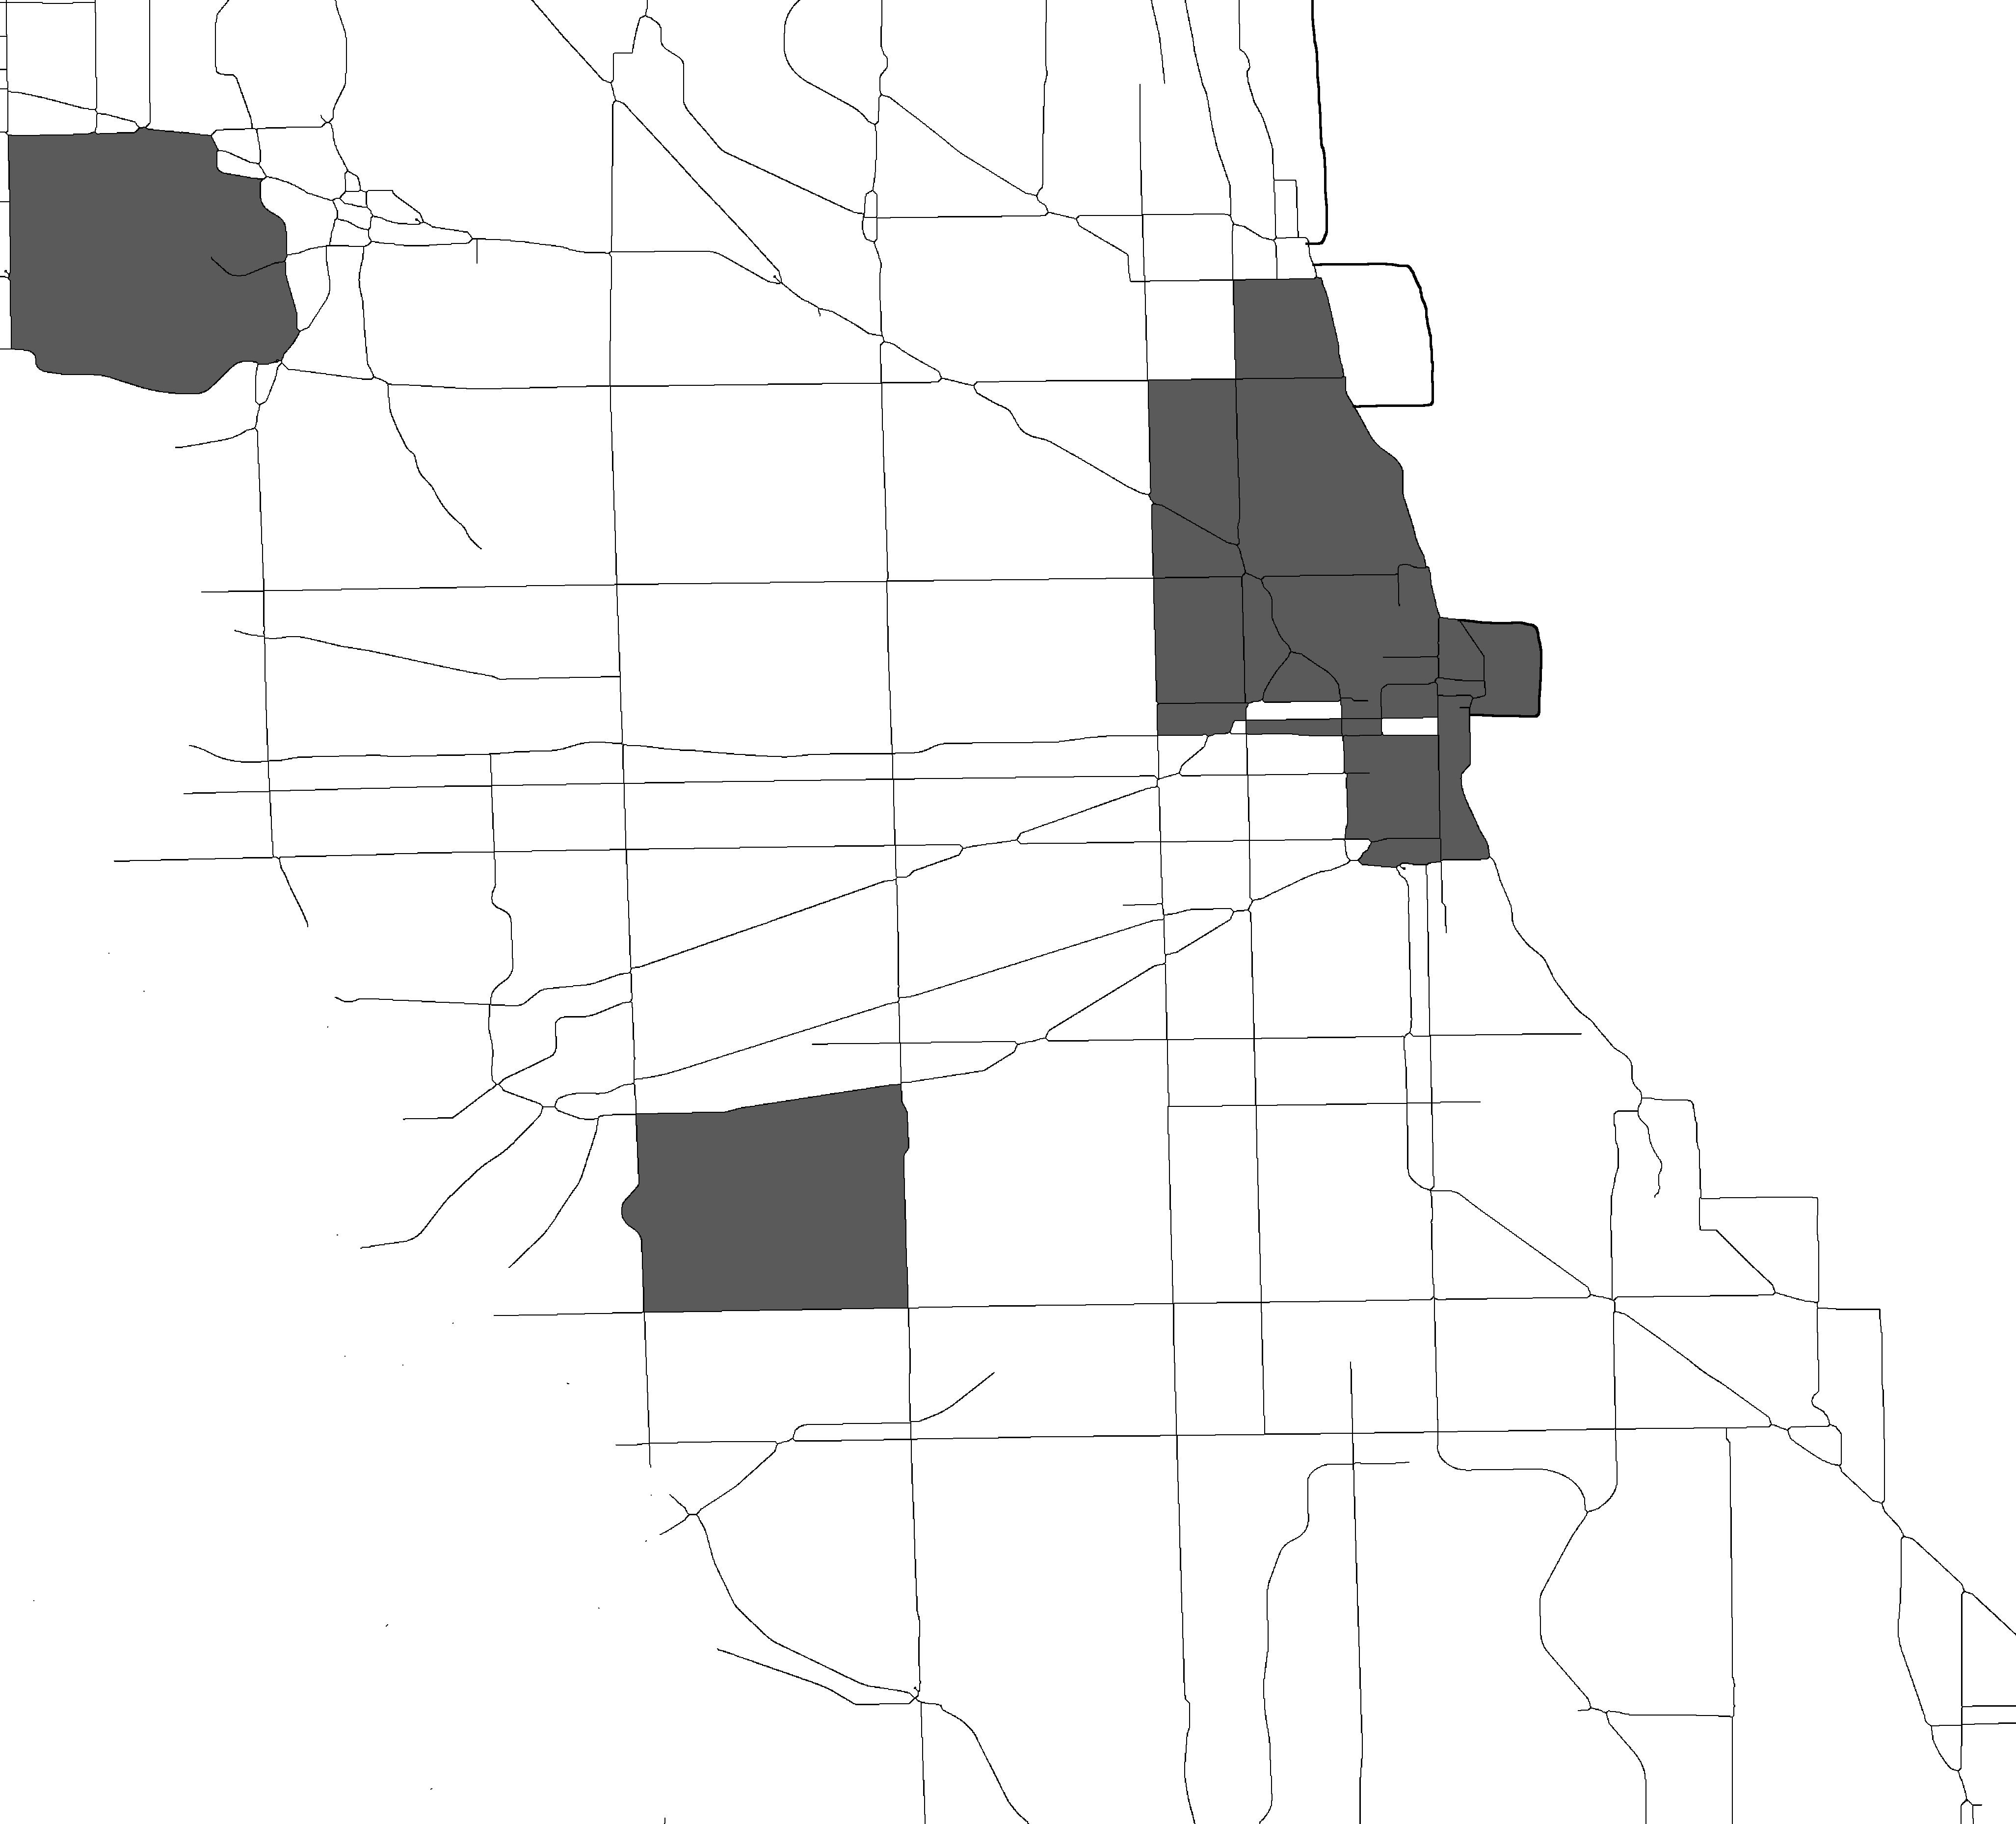

In [65]:
def plotRegionsWithMinimumTaxiTrips(labels, taxiTripsWeightRegionIDPairArray):
    # Map component labels to hue val
    label_hue = np.uint8(179*labels/np.max(labels))
    blank_ch = 255*np.ones_like(label_hue)

    #labeled_img = cv2.merge([blank_ch, blank_ch, blank_ch])
    labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])

    # cvt to BGR for display
    labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)

    # set bg label to black
    labeled_img[label_hue!=0] = 255
    labeled_img[label_hue==0] = 0
    for pair in taxiTripsWeightRegionIDPairArray:
      regionIDValue = np.uint8(179*pair[0]/np.max(labels))
      labeled_img[label_hue==regionIDValue] = 90

    from google.colab.patches import cv2_imshow
    cv2_imshow(labeled_img)

plotRegionsWithMinimumTaxiTrips(labels_im, minimumTaxiTripsWeightRegionIDPairArray)

## **Conclusion**




This Jupyter notebook allowed us to explore the time series, select the regions according to the taxi trips data they each contain. In addition, we saw that taxi trips have complex patterns as well as hourly, daily, and weekly periodicities, in addition to trends and noise corresponding to instantaneous changes in taxi demand.

In the next Jupyter notebook, we will build statistical models adapted to the taxi flows time series.

